In [1]:
#import the function from functions folder
from functions.functions import get_Normalized_DataFrame, get_DataFrame

# import the libraries
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
df = get_Normalized_DataFrame('data/players.json')
df.drop(columns=['passportArea.id', 'passportArea.alpha3code', 'passportArea.alpha2code', 'role.code2', 'role.code3', 'birthArea.id', 'birthArea.alpha3code', 'birthArea.alpha2code'], inplace=True)
df.rename(columns={'passportArea.name':'passportArea', 'role.name':'role', 'birthArea.name':'birthArea', 'wyId':'playerId'}, inplace=True)
df.head()

,weight,firstName,middleName,lastName,currentTeamId,birthDate,height,playerId,foot,shortName,currentNationalTeamId,passportArea,role,birthArea
0,78,Harun,,Tekin,4502,1989-06-17,187,32777,right,H. Tekin,4687,Turkey,Goalkeeper,Turkey
1,73,Malang,,Sarr,3775,1999-01-23,182,393228,left,M. Sarr,4423,Senegal,Defender,France
2,72,Over,,Mandanda,3772,1998-10-26,176,393230,,O. Mandanda,null,France,Goalkeeper,France
3,82,Alfred John Momar,,N'Diaye,683,1990-03-06,187,32793,right,A. N'Diaye,19314,Senegal,Midfielder,France
4,84,Ibrahima,,Konat\u00e9,2975,1999-05-25,192,393247,right,I. Konat\u00e9,null,France,Defender,France


In [3]:
df.head()

,weight,firstName,middleName,lastName,currentTeamId,birthDate,height,playerId,foot,shortName,currentNationalTeamId,passportArea,role,birthArea
0,78,Harun,,Tekin,4502,1989-06-17,187,32777,right,H. Tekin,4687,Turkey,Goalkeeper,Turkey
1,73,Malang,,Sarr,3775,1999-01-23,182,393228,left,M. Sarr,4423,Senegal,Defender,France
2,72,Over,,Mandanda,3772,1998-10-26,176,393230,,O. Mandanda,null,France,Goalkeeper,France
3,82,Alfred John Momar,,N'Diaye,683,1990-03-06,187,32793,right,A. N'Diaye,19314,Senegal,Midfielder,France
4,84,Ibrahima,,Konat\u00e9,2975,1999-05-25,192,393247,right,I. Konat\u00e9,null,France,Defender,France


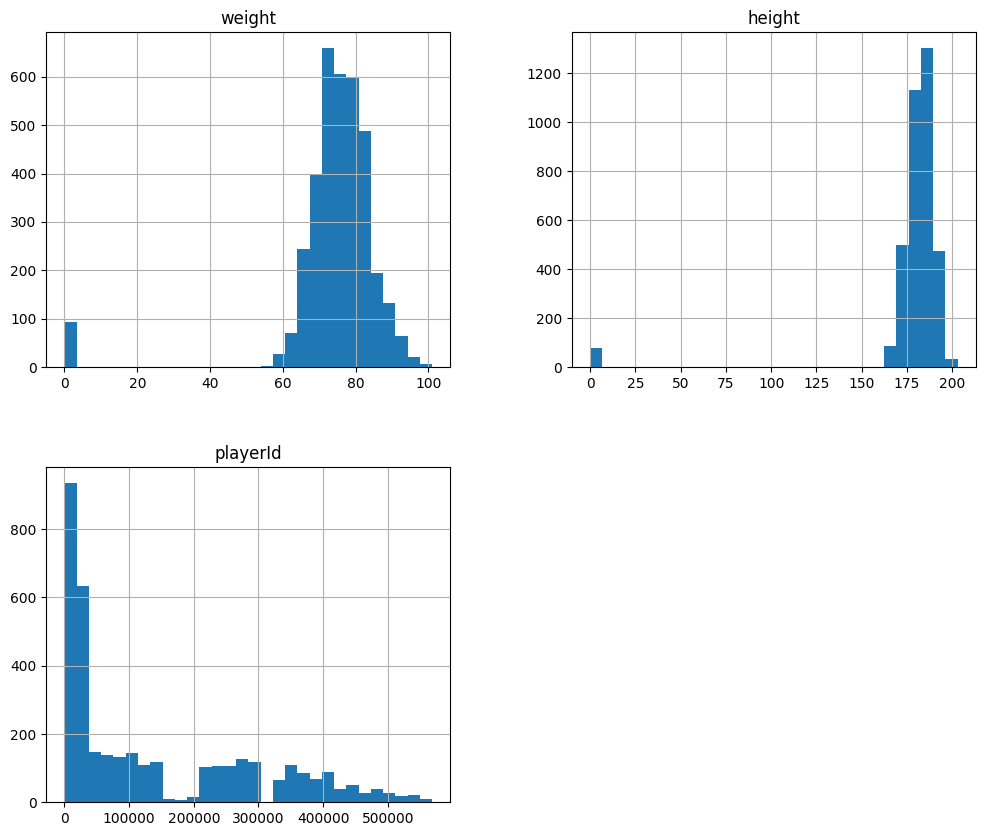

In [4]:
df.hist(figsize=(12, 10), bins=30)
plt.show()

In [5]:

#     allTeams = []
#     formationPlayers = []
#     subPlayers = []
#     allReferees = []
#     for match in data:
#         matchTeamsData = match['teamsData']

#         for team in matchTeamsData:
#             # print(team)
#             teamGameStats = matchTeamsData[team]
#             teamList = list(teamGameStats.values())
#             teamList.insert(0, f"{match['wyId']}")
#             allTeams.append(teamList)
#             everyTeam.append(teamList)

#             if teamGameStats['hasFormation'] == True:
#                 for formationBreak in teamGameStats['formation']:
#                     if formationBreak == 'substitutions': 
#                         if teamGameStats['formation'][formationBreak] == 'null':
#                             continue

#                         else:
#                             for eachSub in teamGameStats['formation'][formationBreak]:
#                                 vals = eachSub.values()
#                                 valList = list(vals)
#                                 valList.insert(0, f"{formationBreak}")
#                                 valList.insert(0, f"{match['wyId']}")
#                                 if len(valList) < 6:
#                                     valList.insert(3, 0)
#                                 subPlayers.append(valList)
#                                 everySub.append(valList)
#                             continue

#                     eachFormBreak = teamGameStats['formation'][formationBreak]
#                     if eachFormBreak == 'null':
#                         continue

#                     else:
#                         for eachPlayer in eachFormBreak:
#                             vals = eachPlayer.values()
#                             valList = list(vals)
#                             valList.insert(0, f"{formationBreak}")
#                             valList.insert(0, f"{match['wyId']}")
#                             if len(valList) < 8:
#                                 valList.insert(3, 0)
#                             formationPlayers.append(valList)
#                             everyPlayer.append(valList)

#         referees = match['referees']
#         refereeList = []
#         refereeList.append(int(match['wyId']))
#         for referee in referees:       
#             refereeList.append(int(referee['refereeId']))

#         if len(refereeList) < 7:
#             refereeList.extend([0] * (7 - len(refereeList)))


#         allReferees.append(refereeList)
#         everyReferee.append(refereeList)
#     # print(allTeams)

#     dfPlayer = pd.DataFrame(formationPlayers)
#     dfPlayerIndexed = dfPlayer.rename(columns={0: 'MatchId', 1: 'formation', 2: 'playerId', 3: 'assists', 4: 'ownGoals', 5: 'redCards', 6: 'goals', 7: 'yellowCards'})
#     dfSub = pd.DataFrame(subPlayers)
#     dfSubIndexed = dfSub.rename(columns={0: 'MatchId', 1: 'formation', 2: 'playerIn', 3: 'assists', 4: 'playerOut', 5: 'minute'})
#     dfAllTeams = pd.DataFrame(allTeams)
#     dfAllTeams.drop([8], axis=1, inplace=True)
#     dfAllTeamsIndexed = dfAllTeams.rename(columns={0: 'MatchId', 1: 'scoreET', 2: 'coachId', 3: 'side', 4: 'teamId', 5: 'score', 6: 'scoreP', 7: 'hasFormation', 9: 'scoreHT'})  
#     dfAllMatches = pd.DataFrame(data)
#     dfAllMatches.drop(['teamsData'], axis=1, inplace=True)
#     dfAllMatches.drop(['referees'], axis=1, inplace=True)
#     dfAllReferees = pd.DataFrame(allReferees)
#     dfAllRefereesIndexed = dfAllReferees.rename(columns={0: 'MatchId', 1: 'referee', 2: 'firstAssistant', 3: 'secondAssistant', 4: 'fourthOfficial', 5: 'firstAdditionalAssistant', 6: 'secondAdditionalAssistant'})

# everyTeamDF = pd.DataFrame(everyTeam).drop([8], axis=1).rename(columns={0: 'MatchId', 1: 'scoreET', 2: 'coachId', 3: 'side', 4: 'teamId', 5: 'score', 6: 'scoreP', 7: 'hasFormation', 9: 'scoreHT'})
# everyTeamDF['MatchId'] = everyTeamDF['MatchId'].astype(int)
# everyPlayerDF = pd.DataFrame(everyPlayer).rename(columns={0: 'MatchId', 1: 'formation', 2: 'playerId', 3: 'assists', 4: 'ownGoals', 5: 'redCards', 6: 'goals', 7: 'yellowCards'})
# everyPlayerDF[['ownGoals','goals']] = everyPlayerDF[['ownGoals', 'goals']].replace('null', 0)
# everyPlayerDF[['MatchId', 'playerId', 'assists', 'redCards', 'goals', 'yellowCards','ownGoals']] = everyPlayerDF[['MatchId', 'playerId', 'assists', 'redCards', 'goals', 'yellowCards', 'ownGoals']].astype(int)
# everyRefereeDF = pd.DataFrame(everyReferee).rename(columns={0: 'MatchId', 1: 'referee', 2: 'firstAssistant', 3: 'secondAssistant', 4: 'fourthOfficial', 5: 'firstAdditionalAssistant', 6: 'secondAdditionalAssistant'})
# everySubDF = pd.DataFrame(everySub).rename(columns={0: 'MatchId', 1: 'formation', 2: 'playerIn', 3: 'assists', 4: 'playerOut', 5: 'minute'})
# everySubDF[['assists']] = everySubDF[['assists']].replace('null', 0).astype(int)

# dfAllMatches = pd.DataFrame(allData).rename(columns={'wyId': 'MatchId'})
# dfAllMatches.drop(['teamsData'], axis=1, inplace=True)
# dfAllMatches.drop(['referees'], axis=1, inplace=True)

In [6]:
print(dfAllRefereesIndexed.shape)
dfAllRefereesIndexed.head()

NameError: name 'dfAllRefereesIndexed' is not defined

In [ ]:
print(dfAllMatches.shape)

dfAllMatches.head()

In [ ]:
print(dfAllTeamsIndexed.shape)
dfAllTeamsIndexed.head()

In [ ]:
print(dfPlayerIndexed.shape)
dfPlayerIndexed.head()

In [ ]:
print(dfSubIndexed.shape)
dfSubIndexed.head()

In [ ]:
print(everyTeamDF.shape)
everyTeamDF.head()

In [ ]:
print(everyPlayerDF.shape)
everyPlayerDF.head()

In [ ]:
print(everySubDF.shape)
everySubDF.head()

In [ ]:
print(everyRefereeDF.shape)
everyRefereeDF.head()

In [ ]:
allGames = dfAllMatches.merge(everyTeamDF, on='MatchId', how='left')
print(allGames.shape)
allGames.head()

In [ ]:
winners = allGames[allGames['teamId'] == allGames['winner']]
winners.head(7)

In [ ]:
# make side a boolean
winners['side'] = winners['side'].replace(['home','away'], [1,0])
winners['duration'] = winners['duration'].replace(['Regular','ExtraTime','Penalties'], [0,1,2])
winners.drop(['status', 'roundId', 'gameweek', 'seasonId', 'dateutc', 'label', 'date', 'groupName', 'competitionId', 'teamId', 'hasFormation', 'winner', 'venue', 'MatchId', 'coachId'], axis=1, inplace=True)
winners

In [ ]:
winners.hist(figsize=(12, 10), bins=30)
plt.show()

In [ ]:
sns.heatmap(winners.corr(), annot=True, annot_kws={"fontsize":8})
plt.show()